In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the combined dataset
data = pd.read_csv('combined_stock_sentiment_data.csv')

In [3]:
# Prepare the features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Volume', 'sentiment']].fillna(0)
y = data['Close']

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [5]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

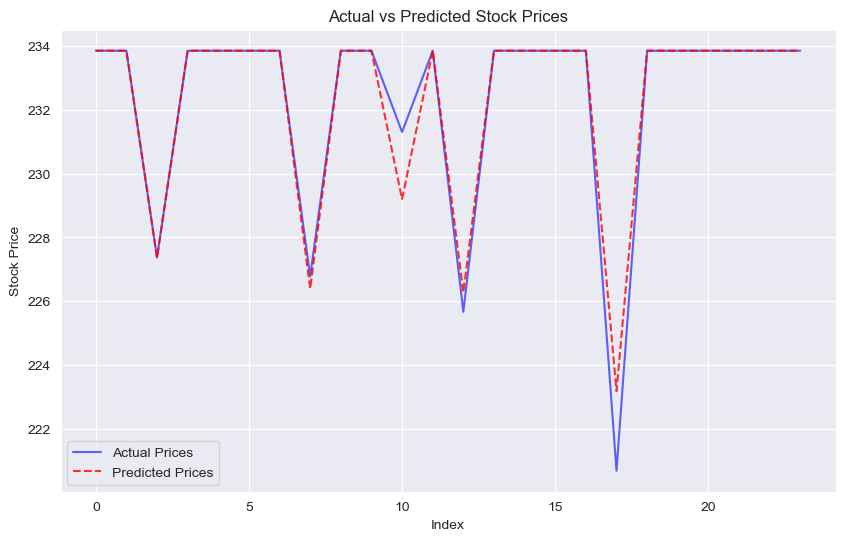

In [6]:
# Plot 1: Actual vs Predicted Stock Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--', alpha=0.8)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\arpan\AppData\Local\Temp\ipykernel_41416\1455487603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


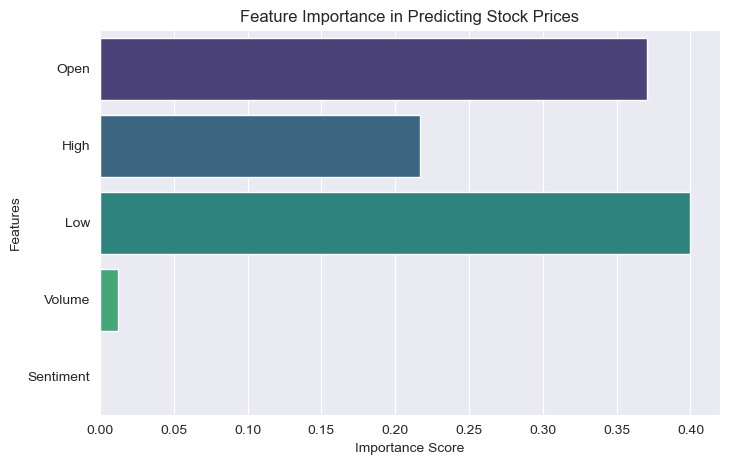

In [7]:
# Plot 2: Feature Importance
importances = model.feature_importances_
features = ['Open', 'High', 'Low', 'Volume', 'Sentiment']
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance in Predicting Stock Prices')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

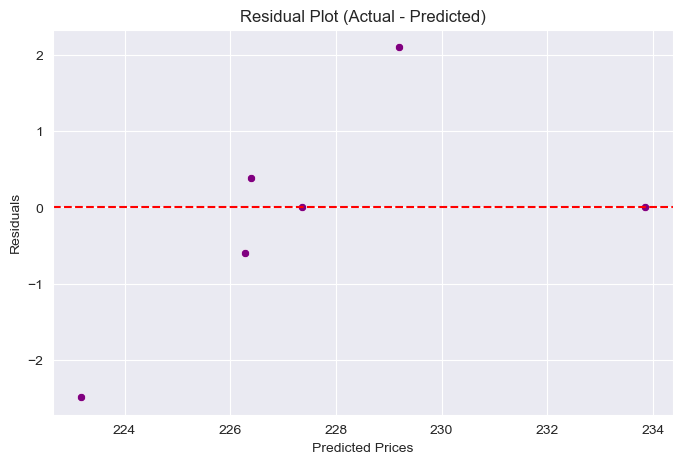

In [8]:
# Plot 3: Residual Plot (Actual - Predicted)
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Actual - Predicted)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [9]:
# Additional Print Statements (Performance Metrics)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.4641472491061078
R^2 Score: 0.9602400594928939
